In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
#plt.rc('font', family='AppleGothic')

sns.set_palette('Set2', n_colors=10)  #seaborn은 테마, 팔레트 설정이 필요함
plt.rc('axes', unicode_minus=False) #seaborn '테마 => 팔레트 => 폰트 => 폰트깨질경우' 순으로 설정

In [147]:
# 데이터 불러오기
df =pd.read_excel('가장_많이_이용하는_OTT_서비스의_주_이용_매체_1순위_20230611032727.xlsx')

# 필요 없는 열 제거
df = df.drop(df.columns[2:8], axis=1, inplace=False)

# 1번째 행을 열 이름으로 바꾸기
df.columns = df.iloc[0]
df = df[1:]

# '전체' 행 선택
df1 = df[(df['구분별(1)'] == '전체')]

# 새로운 열 생성
df1['TV'] = df1['TV 수상기 (%)']
df1['MOBILE'] = df1['스마트폰 (%)'] + df1['태블릿PC (%)']
df1['PC'] = df1['데스크톱 컴퓨터 (%)'] + df1['노트북 컴퓨터 (%)']
df1['CAR'] = 0

# 필요한 열만 선택
df1 = df1[['TV', 'MOBILE', 'PC', 'CAR']]

# '국가' 열 추가 및 인덱스로 설정
df1['국가'] = '한국'
df1.set_index('국가', inplace=True)

df1.head()

,TV,MOBILE,PC,CAR
국가,,,,
한국,6.5,90.9,2.7,0


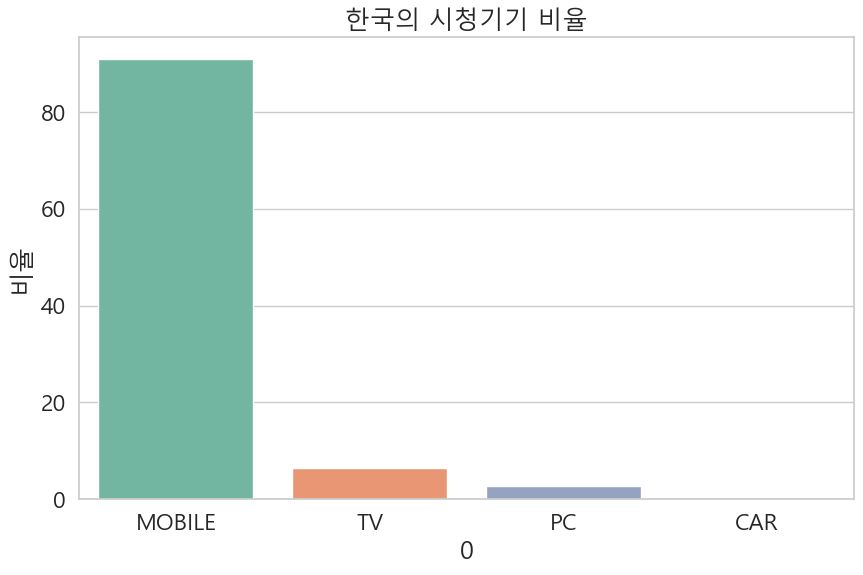

In [149]:
# 한국 데이터 추출
df_korea = df1.loc['한국']
df_korea = pd.DataFrame(df_korea)

# 값을 크기 순으로 정렬
df_korea= df_korea.sort_values(by=df_korea.columns[0], ascending=False)

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
sns.barplot(x=df_korea.index, y=df_korea['한국'])

# 막대 그래프 그리기
#df_korea.plot(kind='bar', rot = 0)

# 그래프 제목과 축 레이블 설정
plt.title('한국의 시청기기 비율')
#plt.xlabel('디지털 미디어')
plt.ylabel('비율')

# 그래프 출력
plt.show()

In [120]:
# 데이터 불러오기
df =pd.read_csv('가장_많이_이용하는_OTT_서비스의_주_이용_매체_1순위_20230611032035.csv',encoding='euc-kr')

df.columns=df.iloc[0]    #첫번째 행을 columns로 설정 
df=df.iloc[1:,:8]  #2021년 데이터만 뽑아냄
df=df[1:]  #첫번째 행 제거
df.iloc[:,2:]=df.iloc[:,2:].astype(float) # float으로 변환

df.head()

,구분별(1),구분별(2),사례수 (명),스마트폰 (%),태블릿PC (%),데스크톱 컴퓨터 (%),노트북 컴퓨터 (%),TV 수상기 (%)
2,성별,남,4283.5,93.8,2.3,1.1,1.0,1.8
3,성별,여,4010.2,91.8,3.0,0.5,1.4,3.3
4,연령,만10대미만,174.5,61.5,28.8,0.5,0.9,8.4
5,연령,만10-19세,880.1,87.1,5.2,2.7,3.5,1.5
6,연령,만20-29세,1381.4,90.0,4.6,1.1,3.0,1.4


In [121]:
# '태블릿PC (%)', '데스크톱 컴퓨터 (%)', '노트북 컴퓨터 (%)', 'TV 수상기 (%)' 열의 값을 행 단위로 합산
other_sum =df[['태블릿PC (%)','데스크톱 컴퓨터 (%)','노트북 컴퓨터 (%)','TV 수상기 (%)']].sum(axis=1) 
df['기타']=other_sum
df.head()

,구분별(1),구분별(2),사례수 (명),스마트폰 (%),태블릿PC (%),데스크톱 컴퓨터 (%),노트북 컴퓨터 (%),TV 수상기 (%),기타
2,성별,남,4283.5,93.8,2.3,1.1,1.0,1.8,6.2
3,성별,여,4010.2,91.8,3.0,0.5,1.4,3.3,8.2
4,연령,만10대미만,174.5,61.5,28.8,0.5,0.9,8.4,38.6
5,연령,만10-19세,880.1,87.1,5.2,2.7,3.5,1.5,12.9
6,연령,만20-29세,1381.4,90.0,4.6,1.1,3.0,1.4,10.1


<Axes: xlabel='구분별(2)', ylabel='태블릿PC (%)'>

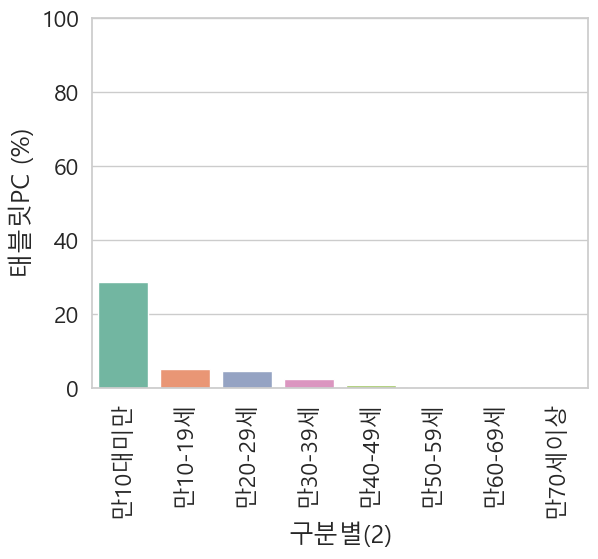

In [122]:
age=df[df['구분별(1)']=='연령']

#연령대별 태블릿 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=age['구분별(2)'], y=age['태블릿PC (%)'])

<Axes: xlabel='구분별(2)', ylabel='노트북 컴퓨터 (%)'>

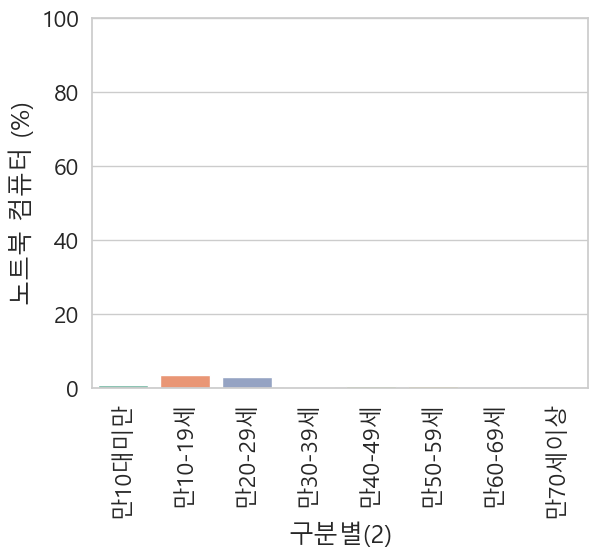

In [123]:
#연령대별 노트북 컴퓨터 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=age['구분별(2)'], y=age['노트북 컴퓨터 (%)'])

<Axes: xlabel='구분별(2)', ylabel='TV 수상기 (%)'>

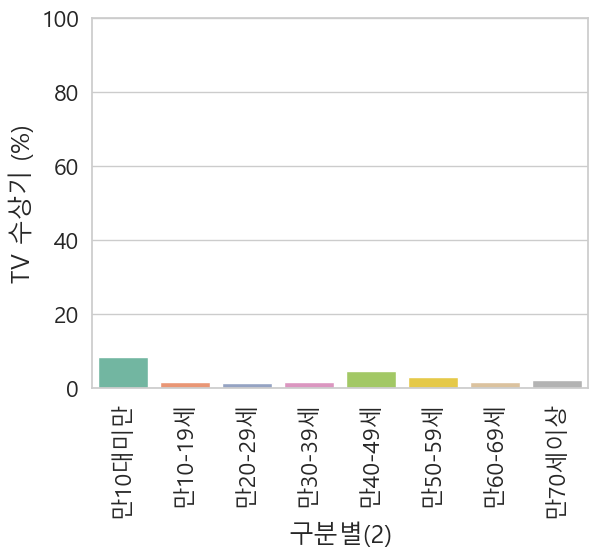

In [124]:
#연령대별 TV 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=age['구분별(2)'], y=age['TV 수상기 (%)'])

<Axes: xlabel='구분별(2)', ylabel='태블릿PC (%)'>

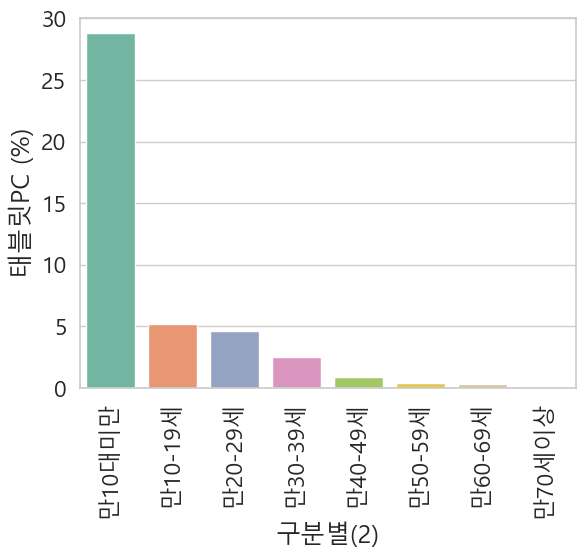

In [125]:
#연령대별 태블릿 이용률 (y축 변화)
plt.xticks(rotation=90)
plt.ylim(0, 30)
sns.barplot(x=age['구분별(2)'], y=age['태블릿PC (%)'])

<Axes: xlabel='구분별(2)', ylabel='노트북 컴퓨터 (%)'>

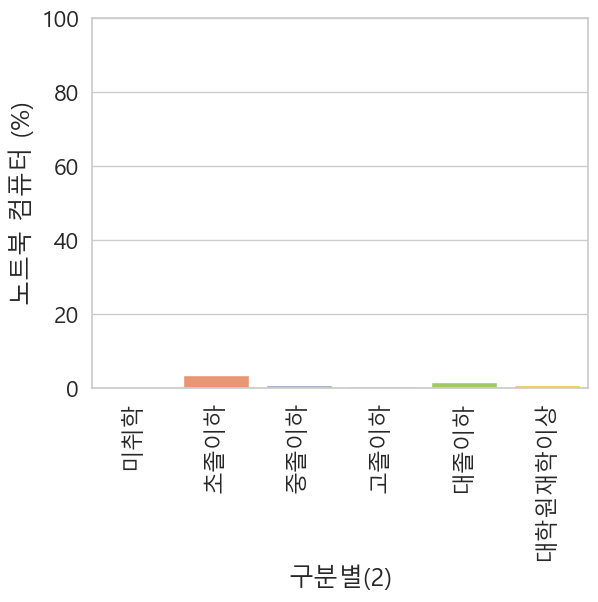

In [126]:
edu=df[df['구분별(1)']=='학력1']

#학력별 노트북 컴퓨터 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=edu['구분별(2)'], y=edu['노트북 컴퓨터 (%)'])

<Axes: xlabel='구분별(2)', ylabel='태블릿PC (%)'>

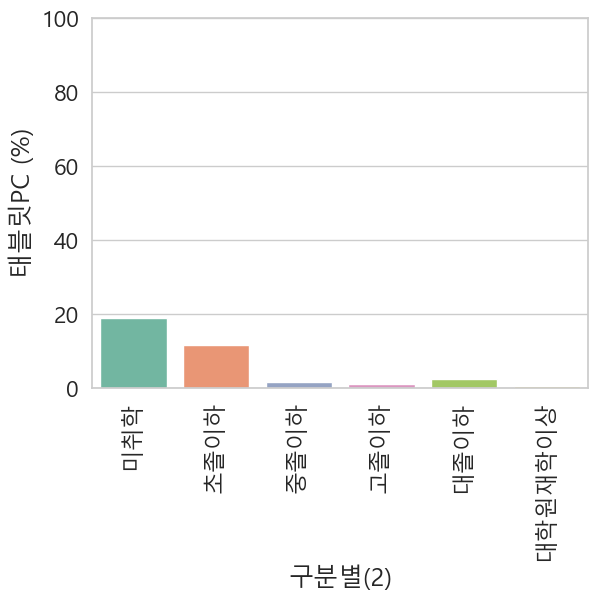

In [127]:
#학력별 태블릿 PC 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=edu['구분별(2)'], y=edu['태블릿PC (%)'])

<Axes: xlabel='구분별(2)', ylabel='TV 수상기 (%)'>

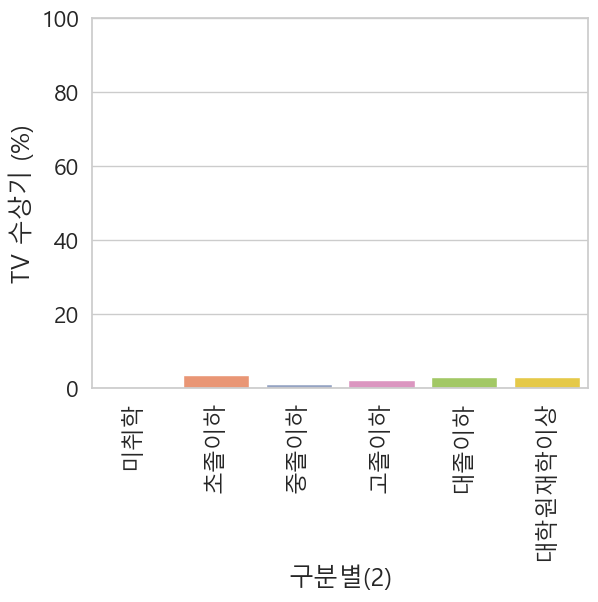

In [128]:
#학력별 TV 이용률
plt.xticks(rotation=90)
plt.ylim(0, 100)
sns.barplot(x=edu['구분별(2)'], y=edu['TV 수상기 (%)'])

<Axes: xlabel='구분별(2)', ylabel='태블릿PC (%)'>

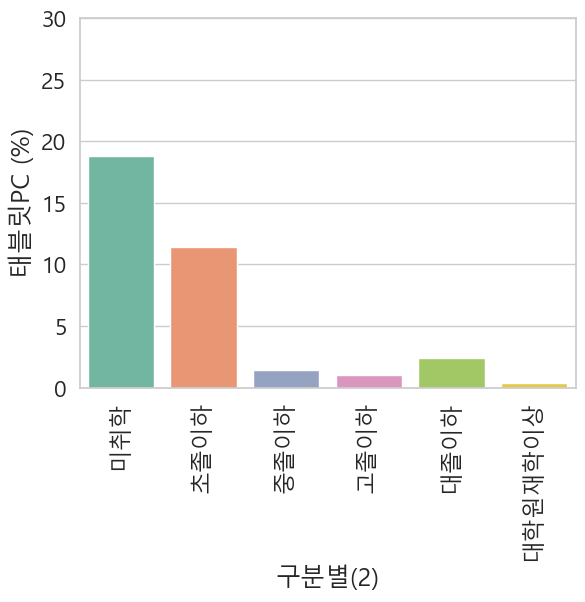

In [129]:
#학력별 태블릿 PC 이용률 (y축 변화)
plt.xticks(rotation=90)
plt.ylim(0, 30)
sns.barplot(x=edu['구분별(2)'], y=edu['태블릿PC (%)'])